In [1]:
#import modules
import pandas as pd
import numpy as np

### Data preprocessing

In [2]:
# Load datasets training datasets:
# Train dataset:
train = pd.read_csv(r'C:\Users\Supun\Desktop\Data Mining\Project\Dataset\train\train.csv')
train.head()

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375


In [3]:
train.shape

(1092059, 4)

In [4]:
# Check null values.
train.isnull().any()

id         False
user_id    False
joke_id    False
Rating     False
dtype: bool

In [5]:
# Check duplicate values
train.duplicated(['id']).sum()

0

<AxesSubplot: >

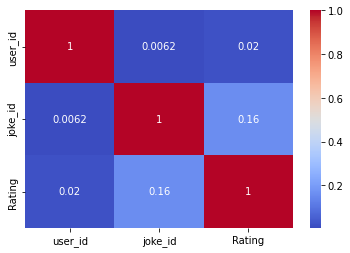

In [6]:
# Create heatmap to correlate the rating
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize = (6,4))
cmap = train.corr()
sns.heatmap(cmap, annot=True, cmap='coolwarm')

In [7]:
# Jokes dataset
jokes = pd.read_csv(r'C:\Users\Supun\Desktop\Data Mining\Project\Dataset\train\jokes.csv')
jokes.head()

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...


In [8]:
jokes.shape

(139, 2)

In [9]:
# Check null values.
jokes.isnull().any()

joke_id      False
joke_text    False
dtype: bool

In [10]:
# check dublicate values.
jokes.duplicated(['joke_id']).sum()

0

In [11]:
# Import required modules
import re
import nltk   #import natural language tool kit 
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer

In [12]:
stemmer = PorterStemmer()
stop_words = stopwords.words('english')

# Remove other characters and stopwords in jokes and set letters to lower case and convert words into thier root form.
jokes['joke_text_lowercase'] = jokes['joke_text'].str.lower()
jokes['joke_text_stopwords_removed'] = jokes['joke_text_lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
jokes['processedtext'] = jokes['joke_text_stopwords_removed'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]"," ",x).split() if i not in stop_words]))

In [13]:
jokes = jokes[{'processedtext', 'joke_id'}]
jokes.head()

,joke_id,processedtext
0,1,q j simpson web address slash slash backslash ...
1,2,mani feminist take screw light bulb funni
2,3,q hear dyslex devil worship sold soul santa
3,4,ask japanes visitor elect countri everi morn a...
4,5,q blind person say given matzah hell wrote


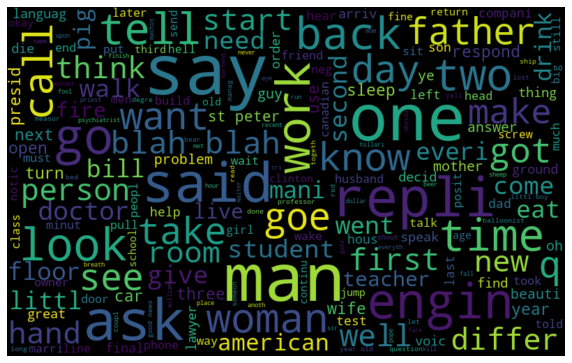

In [14]:
# generate word cloud from processed text
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = ' '.join([text for text in jokes['processedtext']])
wordcloud = WordCloud(width=800, height=500, max_font_size=100).generate(words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# Build a vocabulary collection
from collections import Counter
vocab = Counter()

In [16]:
# Check for processedtext colum in jokes dataset to identify number of words and their frequence.
for sentence in jokes['processedtext']:
    vocab.update(sentence.split())

In [17]:
len(vocab)

1593

In [18]:
from collections import Counter
count = Counter(vocab)
count.most_common()

[('say', 70),
 ('man', 64),
 ('one', 60),
 ('ask', 45),
 ('said', 42),
 ('repli', 42),
 ('go', 39),
 ('engin', 38),
 ('work', 30),
 ('look', 28),
 ('get', 27),
 ('two', 26),
 ('back', 26),
 ('time', 26),
 ('call', 25),
 ('tell', 25),
 ('father', 23),
 ('take', 22),
 ('woman', 22),
 ('room', 22),
 ('know', 20),
 ('day', 20),
 ('blah', 20),
 ('want', 19),
 ('goe', 19),
 ('q', 18),
 ('walk', 18),
 ('littl', 18),
 ('guy', 17),
 ('see', 17),
 ('floor', 17),
 ('year', 16),
 ('would', 16),
 ('got', 16),
 ('make', 16),
 ('person', 15),
 ('american', 15),
 ('first', 15),
 ('well', 15),
 ('news', 15),
 ('like', 14),
 ('differ', 14),
 ('think', 14),
 ('start', 14),
 ('hand', 14),
 ('read', 14),
 ('doctor', 14),
 ('come', 13),
 ('need', 13),
 ('give', 13),
 ('student', 13),
 ('everi', 12),
 ('bill', 12),
 ('second', 12),
 ('old', 12),
 ('eat', 12),
 ('water', 12),
 ('went', 12),
 ('mani', 11),
 ('drink', 11),
 ('pig', 11),
 ('st', 11),
 ('school', 11),
 ('teacher', 11),
 ('die', 11),
 ('live', 11)

In [19]:
# Select words which are greater than 25 frequence as tokens.
tokens = [key for key in vocab if vocab[key] > 25]
len(tokens)

14

In [20]:
tokens

['ask',
 'say',
 'one',
 'two',
 'back',
 'get',
 'said',
 'work',
 'repli',
 'engin',
 'look',
 'go',
 'man',
 'time']

In [21]:
import numpy as np
#Check for the presence of tokens in jokes.
vectorized_joke_text = []
for sentence in jokes['processedtext']:
    sentences = np.zeros(len(tokens))
    for i in range(len(tokens)):
        if tokens[i] in sentence.split():
            sentences[i] = 1
    vectorized_joke_text.append(sentences)
vectorized_jokes = np.asarray(vectorized_joke_text, dtype=np.float32)
vectorized_jokes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [22]:
vectorized_jokes.shape

(139, 14)

In [23]:
# build a dataset for verctorized jokes.
vectorized_df = pd.DataFrame(vectorized_jokes)
vectorized_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
136,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
137,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
#Merge jokes dataset with vectorized_jokes dataset.
vectorized_jokes = pd.merge(jokes, vectorized_df, left_index=True, right_index=True, how='outer')
vectorized_jokes.head()

,joke_id,processedtext,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,q j simpson web address slash slash backslash ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,mani feminist take screw light bulb funni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,q hear dyslex devil worship sold soul santa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,ask japanes visitor elect countri everi morn a...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,q blind person say given matzah hell wrote,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Merge jokes with train dataset
train_df = train.merge(vectorized_jokes, on='joke_id', how='outer')
train_df.head()

,id,user_id,joke_id,Rating,processedtext,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,31030_110,31030,110,2.750,judi troubl comput call toni comput guy desk t...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,9137_110,9137,110,1.719,judi troubl comput call toni comput guy desk t...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,27649_110,27649,110,5.031,judi troubl comput call toni comput guy desk t...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,35355_110,35355,110,3.031,judi troubl comput call toni comput guy desk t...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5478_110,5478,110,3.094,judi troubl comput call toni comput guy desk t...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# From the dataset we selected 10000 samples. (Dataset contains over 1 million samples.)
train_df = train_df.sample(10000, random_state=100)

In [27]:
# Split dataset 
X = train_df.drop(['id','joke_id','processedtext','Rating'], axis=1)
X.head()

,user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13
429216,29000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
652866,34385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
520932,29852,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
784852,16845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
527899,24802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# Rating column has taken as target column
y = train_df['Rating']
y.head()

429216    2.125
652866   -0.594
520932    1.938
784852    9.125
527899    2.656
Name: Rating, dtype: float64

In [29]:
# cross-validation to model traing 
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from numpy import sqrt, mean, absolute, std

def model_acc(model, independent_var, dependent_var):
    y_pred = []
    #define cross-validation method to use
    cv = KFold(n_splits=5, random_state=1, shuffle=True) 

    #use RMSE to evaluate model
    scores = cross_val_score(model, independent_var, dependent_var, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    
    # get the predictions of the model
    y_pred = cross_val_predict(model, independent_var, dependent_var, cv=cv, n_jobs=-1)
    
    # calculate root mean squared error and standard deviation of scores
    print(str(model)+ ' ' + 'RMSE: %.3f' % sqrt(mean(absolute(scores))) + ' ± %.2f' % std(sqrt(absolute(scores))))
    return y_pred

In [30]:
# using regression algorithms to train model

# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_pred_lr = model_acc(lr, X, y)

# support vector regression
from sklearn.svm import SVR
svr = SVR()
y_pred_svr = model_acc(svr, X, y)

# decision treee regression
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
y_pred_dt = model_acc(dt, X, y)

# random forest regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred_rf = model_acc(rf, X, y)

# neural network regression
from sklearn.neural_network import MLPRegressor 
mlp = MLPRegressor()
y_pred_mlp = model_acc(mlp, X, y)

LinearRegression() RMSE: 5.138 ± 0.05
SVR() RMSE: 5.291 ± 0.06
DecisionTreeRegressor() RMSE: 7.131 ± 0.11
RandomForestRegressor() RMSE: 5.739 ± 0.07
MLPRegressor() RMSE: 5.699 ± 0.79


In [31]:
# create new dataframe for prediction values and exporting 
y_real = train['Rating'].sample(10000, random_state=100)
stat_df = pd.DataFrame({'LR_Predicted':y_pred_lr, 'SVR_Predicted':y_pred_svr, 'DT_Predicted':y_pred_dt, 'RF_Predicted':y_pred_rf, 'MLP_Predicted':y_pred_mlp, 'Real':y_real})
stat_df = stat_df.reset_index(drop=True)
stat_df.to_excel("Technique_02_Predictions.xlsx", index=False)
stat_df.head()

,LR_Predicted,SVR_Predicted,DT_Predicted,RF_Predicted,MLP_Predicted,Real
0,2.792449,2.234920,8.844,3.34747,4.522911,0.875
1,-0.013742,2.362924,-0.344,-0.93081,0.015051,-3.094
2,1.488910,2.254002,9.656,5.43792,2.940675,4.688
3,1.730579,2.231210,2.000,-0.21136,1.243517,-5.281
4,1.541006,2.059007,1.125,0.38900,-0.249974,-0.594


In [32]:
# hyperparameter tuning
lr_tuned = LinearRegression(normalize = True)
y_pred_lr_tuned = model_acc(lr_tuned, X, y)

LinearRegression(normalize=True) RMSE: 5.138 ± 0.05


In [33]:
# hyperparameter tuning
lr_tuned = LinearRegression(fit_intercept = False)
y_pred_lr_tuned = model_acc(lr_tuned, X, y)

LinearRegression(fit_intercept=False) RMSE: 5.138 ± 0.05


In [34]:
# Took the linear regression model (that gives highest accuracy) and fit the model.
lr.fit(X, y)

LinearRegression()

### Testing 

In [35]:
# Load test dataset
test = pd.read_csv(r'C:\Users\Supun\Desktop\Data Mining\Project\Dataset\test\test.csv')
test.head()

,id,user_id,joke_id
0,6194_11,6194,11
1,19356_3,19356,3
2,23426_79,23426,79
3,40030_3,40030,3
4,19806_115,19806,115


In [36]:
# Check null values.
test.isnull().any()

id         False
user_id    False
joke_id    False
dtype: bool

In [37]:
# Check duplicate values
test.duplicated(['id']).sum()

0

In [38]:
# Merge jokes with test dataset
test_df = test.merge(vectorized_jokes, on='joke_id', how='outer')
test_df.head()

,id,user_id,joke_id,processedtext,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,6194_11,6194,11,differ use tire use condom one goodyear great ...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13494_11,13494,11,differ use tire use condom one goodyear great ...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35167_11,35167,11,differ use tire use condom one goodyear great ...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25066_11,25066,11,differ use tire use condom one goodyear great ...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25103_11,25103,11,differ use tire use condom one goodyear great ...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Split dataset 
X = test_df.drop(['id','joke_id','processedtext'], axis=1)
X.head()

,user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,6194,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13494,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25066,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25103,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# get predictions for test dataset
testPred = []
testPred = lr.predict(X)
testPred = pd.DataFrame(testPred, columns =['Rating'])
testPred.head()

,Rating
0,1.082097
1,1.066754
2,1.021201
3,1.042431
4,1.042354


In [41]:
# create submission dataframe
Final_df = test.merge(testPred, left_index=True, right_index=True, how='outer')
Final_df = Final_df.drop(['joke_id','user_id'], axis=1)
Final_df.head()

,id,Rating
0,6194_11,1.082097
1,19356_3,1.066754
2,23426_79,1.021201
3,40030_3,1.042431
4,19806_115,1.042354


In [42]:
# export submission file
Final_df.to_csv('Technique_02_Submission.csv',index=False)